In [1]:
#pip install "tensorflow<2.11" 

In [2]:
import tensorflow as tf
import keras
from keras.datasets import mnist
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

In [3]:
tf.__version__

'2.10.1'

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [33]:
def plot_2d(arr_2d, hue = None):
    sns.scatterplot(arr_2d[:, 0], arr_2d[:, 1], hue = hue)
    plt.show()

In [34]:
iris = datasets.load_iris()

iris_data = iris.data - iris.data.mean(axis = 0)
iris_df = pd.DataFrame(iris_data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']) 
y = iris.target

In [35]:
iris_df.head()

Sepal Length  Sepal Width  Petal Length  Petal Width
0     -0.743333     0.442667        -2.358    -0.999333
1     -0.943333    -0.057333        -2.358    -0.999333
2     -1.143333     0.142667        -2.458    -0.999333
3     -1.243333     0.042667        -2.258    -0.999333
4     -0.843333     0.542667        -2.358    -0.999333

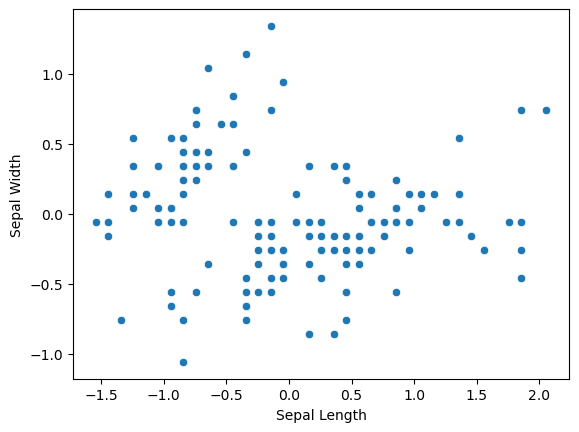

In [36]:
sns.scatterplot(iris_df['Sepal Length'], iris_df['Sepal Width'])
plt.show()

In [37]:
iris_data.shape

(150, 4)

In [38]:
cov_mat = np.dot(iris_data[:, :2].T, iris_data[:, :2])/iris_data.shape[0]
cov_mat

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

In [39]:
eig_values, eig_vectors = np.linalg.eigh(cov_mat)

In [40]:
random = np.c_[np.random.normal(0,1, iris_data.shape[0]), np.random.normal(0,1, iris_data.shape[0])]

random_df = pd.DataFrame(random, columns = ['Sepal Length', 'Sepal Width']) 

In [41]:
random_df.head()

Sepal Length  Sepal Width
0     -0.314460     0.348432
1      1.154038    -0.309928
2     -1.875253    -0.732756
3     -0.201305    -0.132649
4      1.155114    -0.380126

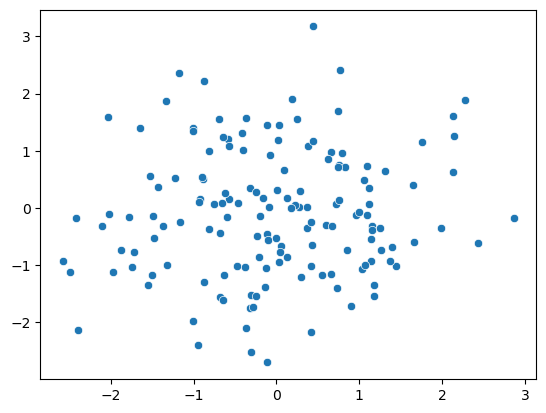

In [42]:
plot_2d(random)

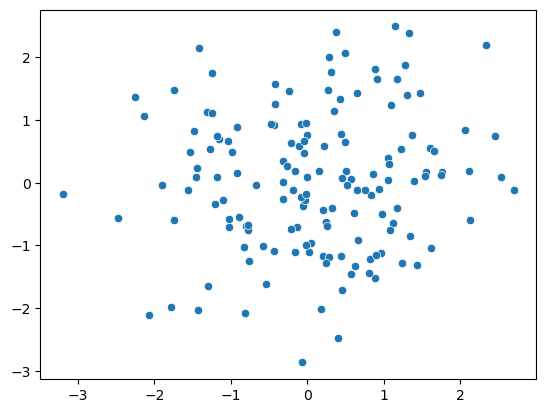

In [43]:
rotation = np.dot(eig_vectors.T, random.T).T

plot_2d(rotation)

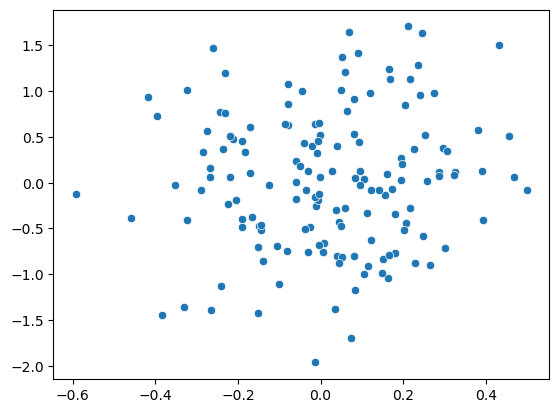

In [44]:
scaling = np.dot(np.diag(eig_values), rotation.T).T

plot_2d(scaling)

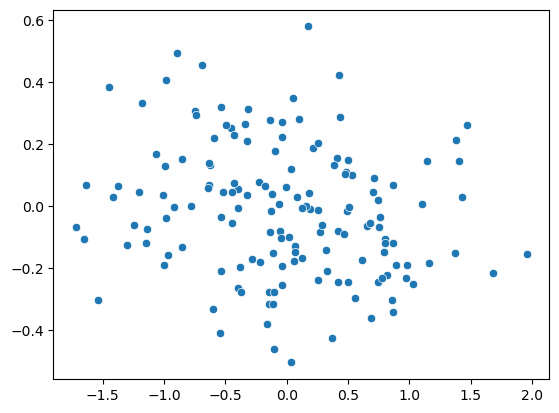

In [45]:
rotate_back = np.dot(eig_vectors, scaling.T).T

plot_2d(rotate_back)

In [46]:
rotate_back.mean(axis = 0)

array([-0.0210019 , -0.01570734])

In [47]:
x = rotate_back - rotate_back.mean(axis = 0)

In [48]:
np.dot(x.T, x)/x.shape[0]

array([[ 0.55968167, -0.02974409],
       [-0.02974409,  0.04396389]])

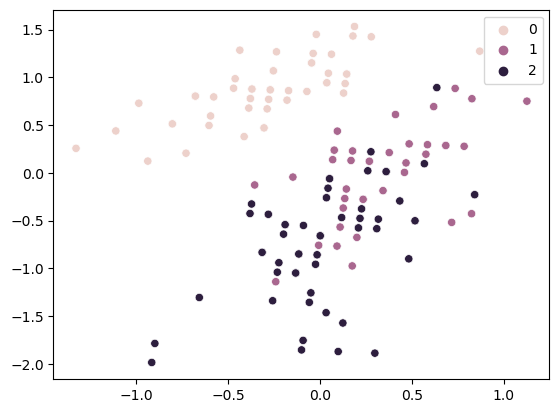

In [50]:
plot_2d(np.dot(eig_vectors.T, iris_data[:, :2].T).T, hue = y)

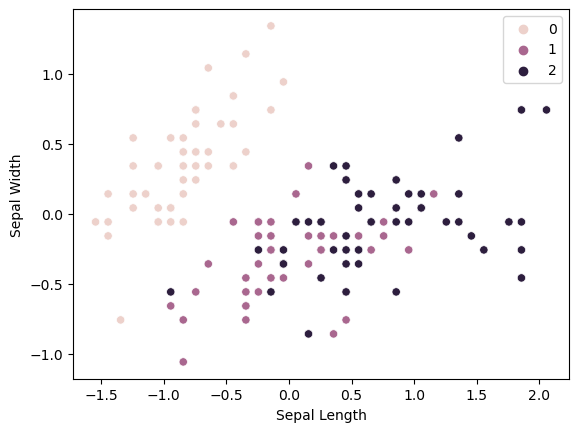

In [20]:
sns.scatterplot(iris_df['Sepal Length'], iris_df['Sepal Width'], hue = y)
plt.show()

In [ ]:
sns.scatterplot(iris_df['Sepal Length'], iris_df['Sepal Width'])
plt.show()

In [28]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

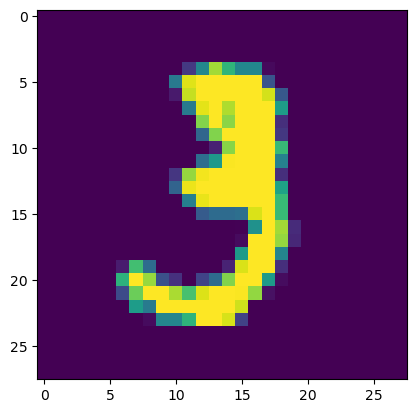

In [29]:
plt.imshow(train_X[10])

In [30]:
train_X.shape

(60000, 28, 28)

In [31]:
train_X = train_X.reshape(60000, -1)

In [32]:
train_X = train_X - train_X.mean(axis = 0)

In [33]:
cov_matrix = np.dot(train_X.T, train_X)/784

In [34]:
eig_values, eig_vectors = np.linalg.eigh(cov_matrix)

In [35]:
eig_values = eig_values[::-1]

In [36]:
eig_vectors = np.fliplr(eig_vectors)

In [37]:
principal_components = np.dot(eig_vectors.T, train_X.T)

In [38]:
principal_components.shape

(784, 60000)

In [39]:
df = pd.DataFrame(principal_components)

In [40]:
df_2dim = df.head(2).T

df_2dim[0]

0        -123.932589
1       -1011.718376
2          51.849608
3         799.127037
4         382.754942
            ...     
59995      99.621760
59996    -152.757810
59997     178.053450
59998    -130.606072
59999     173.435952
Name: 0, Length: 60000, dtype: float64

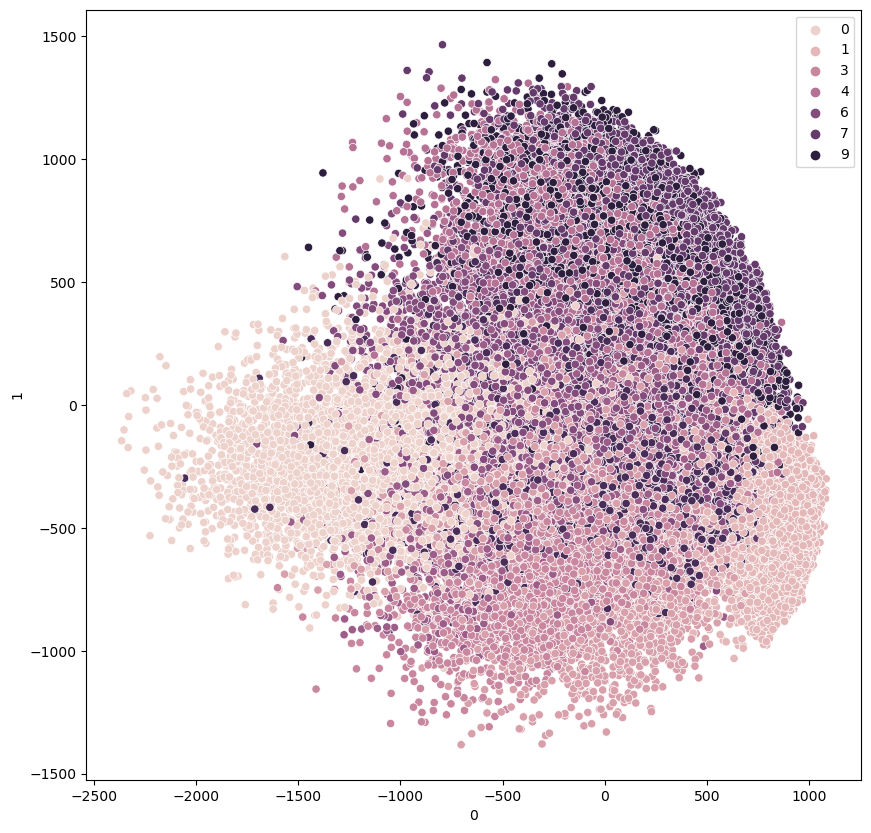

In [41]:
plt.figure(figsize = (10,10))
sns.scatterplot(df_2dim[0], df_2dim[1], hue = train_y)
plt.show()

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components = 2)
pca.fit(train_X)

PCA(n_components=2)

In [44]:
test_X.shape

(10000, 28, 28)

In [45]:
test_X = test_X.reshape(10000, -1)
test_X.shape

(10000, 784)

In [46]:
principal_components = pca.transform(train_X).T

In [47]:
df = pd.DataFrame(principal_components)

In [48]:
df

0            1           2           3           4           5      \
0  123.931949  1011.718277  -51.849560 -799.126928 -382.754998  184.468362   
1 -312.668054  -294.852798  392.170546 -607.199770  730.543337  221.336045   

        6           7           8           9      ...       59990      59991  \
0 -726.513959  513.344569 -868.906706 -304.730493  ... -302.879806 -75.228150   
1 -156.989991 -310.772165  -81.551064  465.596965  ...  279.878016 -76.935227   

        59992       59993       59994       59995      59996       59997  \
0 -404.229510 -313.233446 -805.384929  -99.621495  152.75770 -178.053632   
1  140.801941  -90.992840 -314.248509 -293.485811 -687.90098  160.078893   

        59998       59999  
0  130.605790 -173.435834  
1   -5.585428  -24.722757  

[2 rows x 60000 columns]

In [49]:
df_2dim = df.head(2).T

df_2dim[0]

0         123.931949
1        1011.718277
2         -51.849560
3        -799.126928
4        -382.754998
            ...     
59995     -99.621495
59996     152.757700
59997    -178.053632
59998     130.605790
59999    -173.435834
Name: 0, Length: 60000, dtype: float64

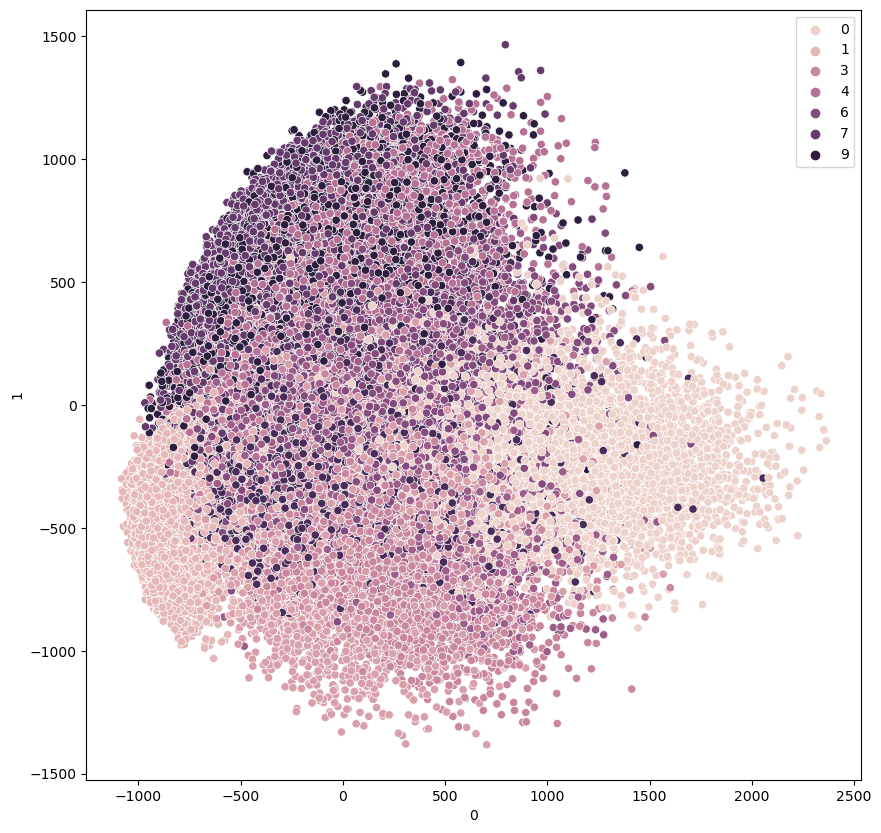

In [50]:
plt.figure(figsize = (10,10))
sns.scatterplot(df_2dim[0], df_2dim[1], hue = train_y, cmap = 'coolwarm')
plt.show()